In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Loss functions for classification
lim = 10.
z = np.linspace(-lim,lim,2.*lim/0.01)
y = -1.

F:\install\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


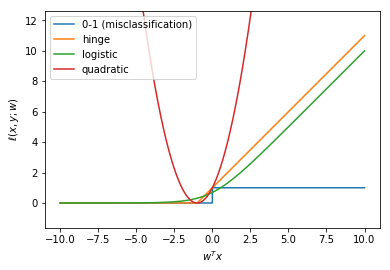

In [6]:
plt.clf()
plt.plot(z, -y*(z>0), label="0-1 (misclassification)")
plt.plot(z, np.fmax(1-y*z, 0), label="hinge")
plt.plot(z, np.log(1+np.exp(-y*z)), label="logistic")
plt.plot(z, (z-y)**2, label="quadratic")
plt.xlabel("$w^T x$")
plt.ylabel("$\ell(x,y; w)$")
plt.axis("equal")
plt.ylim(0,lim+1)
if y==1:
    plt.legend()
else:
    plt.legend(loc=2)

#plt.savefig("classification_loss_y=$(y)_lim=$lim.eps")
plt.show()

F:\install\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


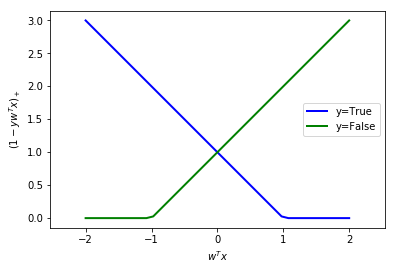

In [7]:
## hinge loss
lim = 2
lw = 2 # linewidth
xx = np.linspace(-lim,lim,2*lim/0.1)
plt.clf()
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='blue', lw=lw,
         label="y=True")
plt.plot(xx, np.where(xx > -1, 1 + xx, 0), color='green', lw=lw,
         label="y=False")
plt.legend()
plt.axis("equal")
plt.xlabel("$w^T x$")
plt.ylabel("$(1-yw^Tx)_+$")
#plt.savefig("hingeloss.pdf")
plt.show()

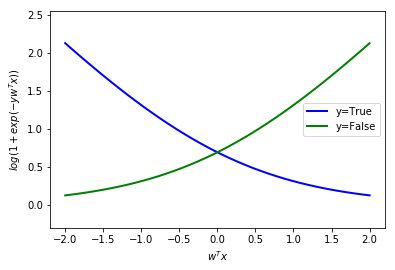

In [8]:
## logistic loss
plt.clf()
plt.plot(xx, np.log(1 + np.exp(-xx)), color='blue', lw=lw,
         label="y=True")
plt.plot(xx, np.log(1 + np.exp(xx)), color='green', lw=lw,
         label="y=False")
plt.legend()
plt.ylim(0,lim)
plt.axis("equal")
plt.xlabel("$w^T x$")
plt.ylabel("$log(1+exp(-yw^Tx))$")
#plt.savefig("logisticloss.pdf")
plt.show()

In [9]:
# Generate and plot data
np.random.seed(0) # seed generator
n = 50
def sample_data(num_points, noise=0):
    X = np.random.rand(num_points,2)*10 - 5
    y = (np.matmul(X,np.array([.3, .4])) + noise*np.random.randn(num_points)) > 0
    return X,y

X,y = sample_data(n, noise=0)
# X,y = sample_data(n, noise=1)

In [22]:
"""function to plot the above data"""
def plotdata(X=X,y=y,margin=.05):
#    plt.hold(True)
    for i in range(len(y)):
        if y[i]==1:
            plt.plot(X[i,0],X[i,1],linestyle='None', marker="o", color="blue", markersize=5)
        else:
            plt.plot(X[i,0],X[i,1],linestyle='None', marker="d", color="red", markersize=5)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    range_y = np.max(X[:,1]) - np.min(X[:,1])
    range_x = np.max(X[:,0]) - np.min(X[:,0])
    plt.ylim([np.min(X[:,1])-margin*range_y,np.max(X[:,1])+margin*range_y])
    plt.xlim([np.min(X[:,0])-margin*range_x,np.max(X[:,0])+margin*range_x])

In [21]:
def plotline(w,b,xmin=-100.,xmax=100.,**kwargs):
    x1samples = np.array([xmin, xmax])
    # w[1]*x[1]+w[2]*x[2]+b = 0
    x2samples = (-b - w[0]*x1samples)/w[1]
    plt.plot(x1samples, x2samples, color="black", **kwargs)

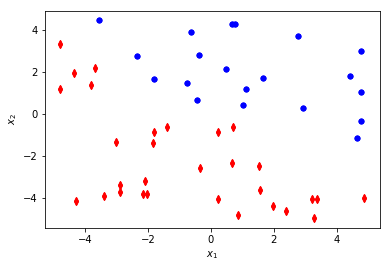

In [24]:
plotdata()
plt.show()

# Hinge Loss

In [19]:
from sklearn.svm import LinearSVC
#X, y = make_classification(n_features=4, random_state=0)
clf = LinearSVC(penalty="l2",loss='hinge') # default l2 regularizer
clf.fit(X, y)
#LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
#     intercept_scaling=1, loss='hinge', max_iter=1000,
#     multi_class='ovr', penalty=None, random_state=0, tol=0.0001,
#     verbose=0)
print(clf.coef_)
print(clf.intercept_)
print(clf.predict([[0, 0]]))
w_hinge = clf.coef_[0]
b_hinge = clf.intercept_
#plotline(w_hinge,b_hinge)
#

[[ 1.03285708  1.44024025]]
[-0.31269297]
[False]


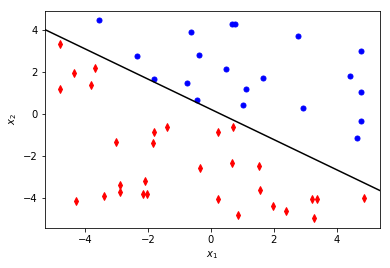

In [25]:
# plot the fit and the margin
plt.clf() # clears the previous figure
plotdata()
plotline(w_hinge,b_hinge)
plt.show()

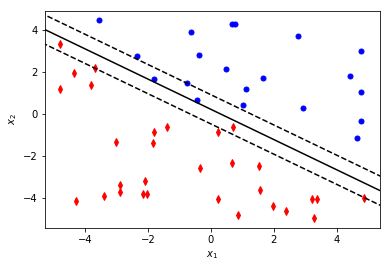

In [28]:
# plot the fit and the margin
plt.clf() # clears the previous figure
plotdata()
plotline(w_hinge,b_hinge)
bs_hinge = [b_hinge+1, b_hinge-1]
for ib in bs_hinge:
    x1samples = np.array([-100, 100])
    # w[1]*x[1]+w[2]*x[2]+b = 0
    x2samples = (-ib - w_hinge[0]*x1samples)/w_hinge[1]
    plt.plot(x1samples, x2samples, color="black", linestyle="--")
plt.show()

ideas to add to picture:

margin

support vectors

# Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression() # default l2 regularizer
model = model.fit(X, y)
# examine the coefficients
w_logistic = model.coef_[0]
b_logistic = model.intercept_

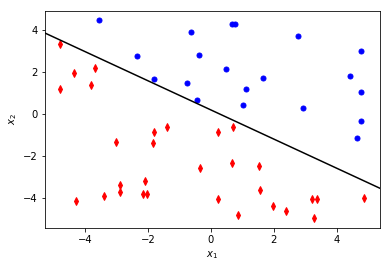

In [30]:
plt.clf() # clears the previous figure
plotdata()
plotline(w_logistic,b_logistic)
plt.show()

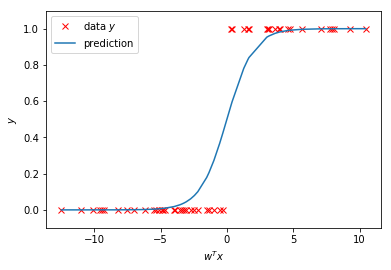

In [31]:
# probability of ±1
z = np.matmul(X,w_logistic)+b_logistic
plt.plot(z, y, color="r", marker="x", linestyle='None', label = "data $y$")
plt.plot(np.sort(z), np.sort(1/(1+np.exp(-z))), label = "prediction")
plt.ylim(-.1, 1.1)
plt.legend(loc=2)
plt.xlabel("$w^T x$")
plt.ylabel("$y$")
# plt.savefig("logistic_data_v_prediction.eps")
plt.show()